In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

83


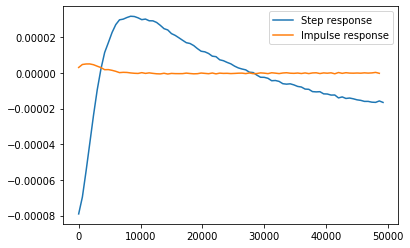

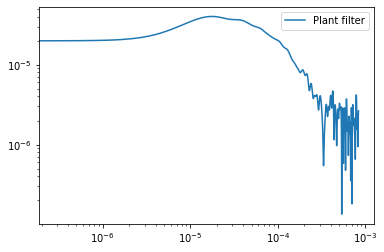

4.993706070287539e-06


In [6]:
ITMYRH_data = np.loadtxt('../data/ITMY_trend_10min_int_longer.dat')
t = np.arange(0,len(ITMYRH_data[:,0][2:]))*60.0*10.0
normalize = 3.13
print(len(t))
data_in = ITMYRH_data[:,1][2:]
b, a = signal.butter(2, .2)
#data_new = signal.filtfilt(b,a,data_in)
data_new = data_in
plt.figure()
ir = (data_new[1:] - data_new[:-1])/normalize
ir_new = ir
plt.plot(t, data_new, label='Step response')
plt.plot(t[:(len(t)-1)], ir, label= 'Impulse response')
plt.legend()
plt.show()

Fs = 1/(t[2]-t[1])
#print(Fs)

[F,H]=signal.freqz(ir_new,1, worN=3000,whole=False) 
plt.figure()
plt.loglog(F*Fs/(2*np.pi), abs(H), label='Plant filter')
plt.legend()
plt.show()


#results = IIRrational.v2.data2filter(
#    data = abs(H),
#    F_Hz = F,
#)
print(max(ir_new))

## Fitting filter

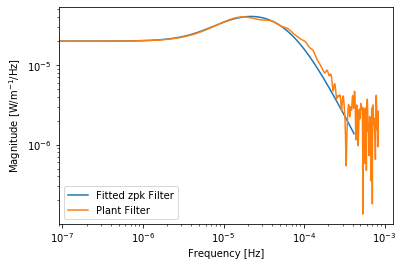

TypeError: object of type 'float' has no len()

In [7]:
#model =  zpk(-2*pi*5e-6, -2.*pi.*[1.3e-5; 9.5e-5; 5e-5],1);

zeros = 5.0e-6
fit_zeros = -2.0*np.pi*zeros
poles = np.array([1.3e-5, 5.0e-5 ,9.5e-5])
fit_poles = -2.0*np.pi*poles

k = 1 #This gain is not initally correct

s1 = signal.ZerosPolesGain(fit_zeros, fit_poles, k)
F_2, H_2 = signal.freqresp(s1, F*(Fs/2.0))

#[F_2,H_2] = signal.freqs(b_2, a_2)
k_new = abs(H[0])/abs(H_2[0])

plt.loglog(F_2/(2*np.pi), abs(H_2)*k_new, label='Fitted zpk Filter')
plt.loglog(F/(2*np.pi)*Fs, abs(H), label='Plant Filter')
plt.ylabel('Magnitude [W/m$^{-1}$/Hz]')
plt.xlabel('Frequency [Hz]')
plt.legend()
plt.show()

model_zpk = signal.ZerosPolesGain(fit_zeros, fit_poles,k_new)

print('The fitted filter is a {} pole and {} zero filter'.format(len(fit_zeros),len(fit_poles)))